<a href="https://colab.research.google.com/github/Dusein/MachineLearningTask/blob/main/6WeekTask/Clustering_Model_For_Hasil_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

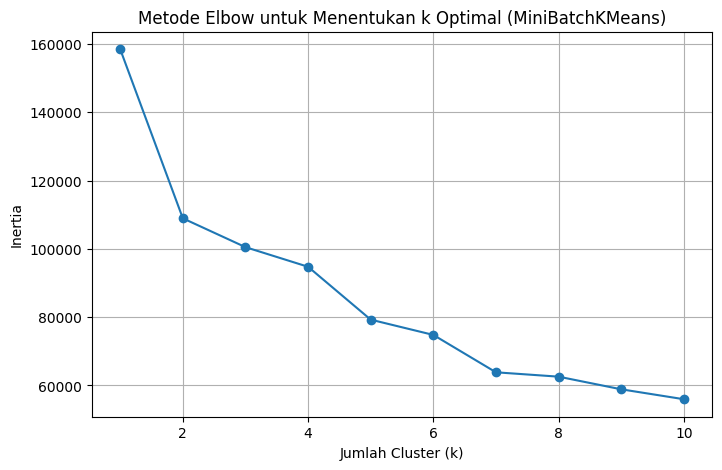

Hasil clustering disimpan dalam 'hasil_clustering.csv'


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans

# Masukin Dataset
file_path = '/content/sample_data/clusteringweek06.csv'
data = pd.read_csv(file_path)

# Standarisasi data untuk memastikan semua fitur berada pada skala yang sama
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Menggunakan MiniBatchKMeans untuk menentukan jumlah cluster optimal (Metode Elbow)
inertia = []  # Daftar untuk menyimpan nilai inertia dari setiap k
k_range = range(1, 11)  # Rentang jumlah cluster yang akan diuji

# Loop untuk menghitung inertia untuk setiap jumlah cluster k
for k in k_range:
    mini_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=100)
    mini_kmeans.fit(data_scaled)
    inertia.append(mini_kmeans.inertia_)  # Menyimpan inertia dari model

# Plot grafik Elbow untuk menemukan titik optimal
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')  # Menampilkan grafik k vs inertia
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k Optimal (MiniBatchKMeans)')
plt.grid(True)
plt.show()

# Pilih nilai k optimal berdasarkan grafik Elbow
optimal_k = 4  # Sesuaikan dengan hasil observasi dari grafik Elbow

# Menerapkan MiniBatchKMeans dengan jumlah cluster optimal
final_kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42, batch_size=100)
final_clusters = final_kmeans.fit_predict(data_scaled)  # Menyimpan hasil cluster untuk setiap data

# Menambahkan hasil clustering ke dalam DataFrame asli
data['Cluster'] = final_clusters

# Simpan hasil clustering ke file baru
data.to_csv('hasil_clustering.csv', index=False)
print("Hasil clustering disimpan dalam 'hasil_clustering.csv'")


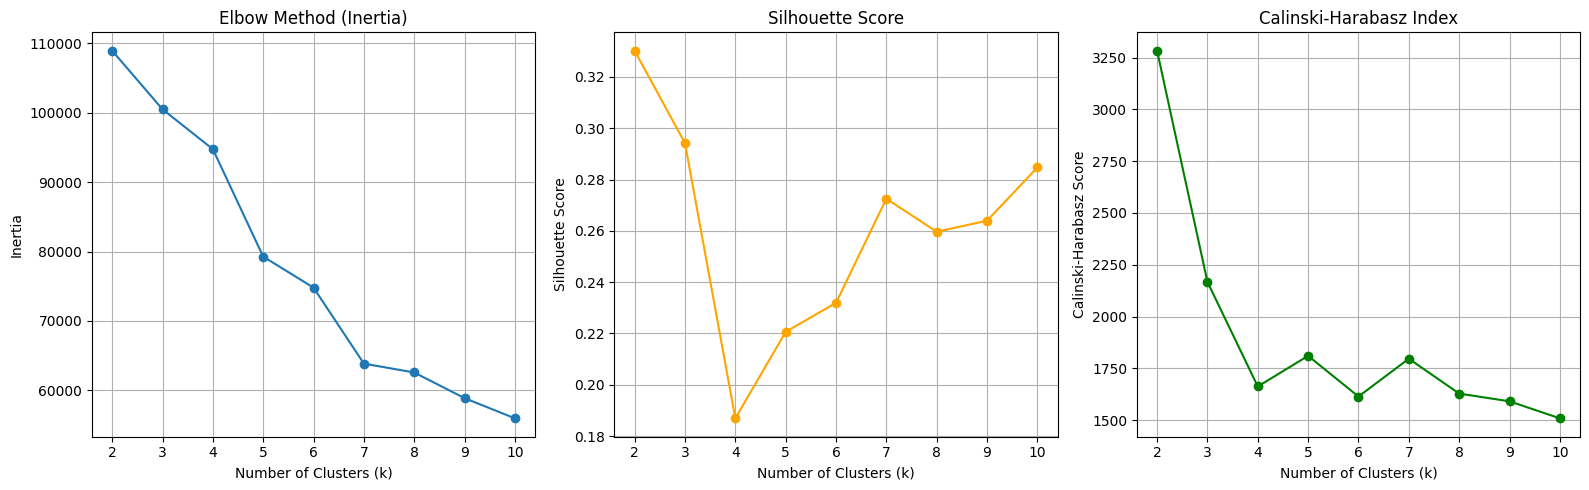

In [7]:
# Import library yang diperlukan
import pandas as pd  # Untuk manipulasi data
import matplotlib.pyplot as plt  # Untuk visualisasi data
from sklearn.preprocessing import StandardScaler  # Untuk standarisasi fitur
from sklearn.cluster import MiniBatchKMeans  # Algoritma clustering MiniBatchKMeans
from sklearn.metrics import silhouette_score  # Metode evaluasi Silhouette Score
from sklearn.metrics import calinski_harabasz_score  # Metode evaluasi Calinski-Harabasz Index

# Load dataset dari file CSV
data = pd.read_csv(file_path)  # Membaca dataset dari file yang diunggah

# Standarisasi data
scaler = StandardScaler()  # Inisialisasi StandardScaler untuk normalisasi data
data_scaled = scaler.fit_transform(data)  # Data diubah menjadi skala standar

# Inisialisasi variabel untuk menyimpan metrik evaluasi
inertia = []  # Menyimpan nilai inertia (jumlah kesalahan kuadrat dalam cluster)
silhouette_scores = []  # Menyimpan nilai silhouette score untuk setiap k
calinski_harabasz_scores = []  # Menyimpan nilai Calinski-Harabasz Index
k_range = range(2, 11)  # Rentang jumlah cluster yang diuji (k mulai dari 2)

# Evaluasi clustering untuk setiap jumlah cluster k
for k in k_range:
    mini_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=100)  # Inisialisasi MiniBatchKMeans dengan k cluster
    cluster_labels = mini_kmeans.fit_predict(data_scaled)  # Melakukan clustering dan mendapatkan label cluster

    # Merekam nilai metrik evaluasi
    inertia.append(mini_kmeans.inertia_)  # Menyimpan nilai inertia
    silhouette_scores.append(silhouette_score(data_scaled, cluster_labels))  # Menyimpan nilai silhouette score
    calinski_harabasz_scores.append(calinski_harabasz_score(data_scaled, cluster_labels))  # Menyimpan nilai Calinski-Harabasz Index

# Visualisasi metrik evaluasi
plt.figure(figsize=(16, 5))  # Membuat figure dengan ukuran 16x5

# Metode Elbow (Inertia)
plt.subplot(1, 3, 1)  # Membuat subplot pertama untuk Elbow Method
plt.plot(k_range, inertia, marker='o')  # Plot k vs inertia
plt.title('Elbow Method (Inertia)')  # Judul grafik
plt.xlabel('Number of Clusters (k)')  # Label sumbu x
plt.ylabel('Inertia')  # Label sumbu y
plt.grid(True)  # Menambahkan grid ke grafik

# Silhouette Score
plt.subplot(1, 3, 2)  # Membuat subplot kedua untuk Silhouette Score
plt.plot(k_range, silhouette_scores, marker='o', color='orange')  # Plot k vs silhouette score
plt.title('Silhouette Score')  # Judul grafik
plt.xlabel('Number of Clusters (k)')  # Label sumbu x
plt.ylabel('Silhouette Score')  # Label sumbu y
plt.grid(True)  # Menambahkan grid ke grafik

# Calinski-Harabasz Index
plt.subplot(1, 3, 3)  # Membuat subplot ketiga untuk Calinski-Harabasz Index
plt.plot(k_range, calinski_harabasz_scores, marker='o', color='green')  # Plot k vs Calinski-Harabasz Index
plt.title('Calinski-Harabasz Index')  # Judul grafik
plt.xlabel('Number of Clusters (k)')  # Label sumbu x
plt.ylabel('Calinski-Harabasz Score')  # Label sumbu y
plt.grid(True)  # Menambahkan grid ke grafik

plt.tight_layout()  # Menyesuaikan layout agar tidak saling tumpang tindih
plt.show()  # Menampilkan semua grafik


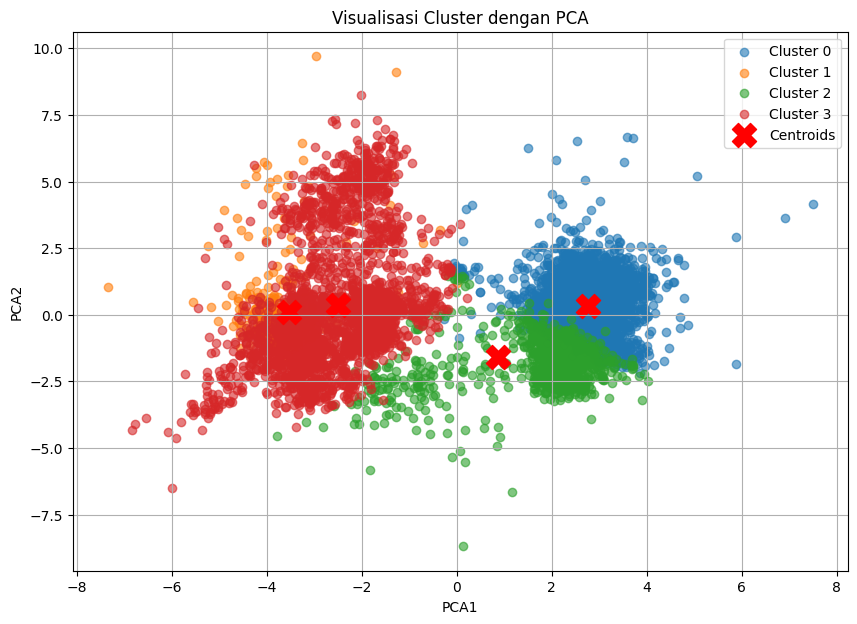

In [6]:
from sklearn.decomposition import PCA

# Pilih jumlah cluster optimal berdasarkan analisis sebelumnya
optimal_k = 4  # Ganti dengan nilai k optimal berdasarkan evaluasi

# Terapkan MiniBatchKMeans dengan jumlah cluster optimal
final_kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42, batch_size=100)
data['Cluster'] = final_kmeans.fit_predict(data_scaled)  # Menyimpan hasil cluster dalam DataFrame

# Reduksi dimensi dengan PCA untuk visualisasi
pca = PCA(n_components=2)  # Mengurangi data menjadi 2 dimensi
data_pca = pca.fit_transform(data_scaled)  # Data setelah PCA

# Menyimpan hasil PCA ke dalam DataFrame untuk visualisasi
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

# Visualisasi hasil clustering
plt.figure(figsize=(10, 7))
for cluster in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.6)

# Menambahkan pusat cluster ke dalam visualisasi
centroids = pca.transform(final_kmeans.cluster_centers_)  # Transformasi centroid ke ruang PCA
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

# Menambahkan label dan judul
plt.title('Visualisasi Cluster dengan PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()
